# STOCK PREDICTION USING TWITTER SENTIMENT ANALYSIS

#### importing machine learning libraries

In [ ]:
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from sklearn import metrics
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as mlpt
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### importing library to fetch data from twitter

In [ ]:
import tweepy
import csv
import pandas as pd
import random
import numpy as np
import pandas as pd

#### setting up consumer key and access token

In [ ]:
consumer_key    = '3jmA1BqasLHfItBXj3KnAIGFB'
consumer_secret = 'imyEeVTctFZuK62QHmL1I0AUAMudg5HKJDfkx0oR7oFbFinbvA'

access_token  = '265857263-pF1DRxgIcxUbxEEFtLwLODPzD3aMl6d4zOKlMnme'
access_token_secret = 'uUFoOOGeNJfOYD3atlcmPtaxxniXxQzAU4ESJLopA1lbC'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

#### Fetching tweets for APPLE in extended mode (means entire tweet will come and not just few words + link)

In [ ]:
fetch_tweets=tweepy.Cursor(api.search_tweets, q="#AAPL",count=100, lang ="en",since="2016-9-13", tweet_mode="extended").items()
data=pd.DataFrame(data=[[tweet_info.created_at.date(),tweet_info.full_text]for tweet_info in fetch_tweets],columns=['Date','Tweets'])

In [ ]:
data

,Date,Tweets
0,2023-05-08,#EURUSD ALL targets hit! 150 pips profit🎯\n\nJ...
1,2023-05-08,#EURJPY ALL targets hit smoothly! 270 pips pro...
2,2023-05-08,Sponsorship opportunities are now available ou...
3,2023-05-08,#CADCHF ALL targets hit! 70 pips profit✅🎯\n\nJ...
4,2023-05-08,#EURGBP ALL targets hit! 85 pips profit🎯🎯\n\nJ...
...,...,...
1509,2023-05-01,RT @Jake__Wujastyk: $AAPL #AAPL How convenient...
1510,2023-05-01,RT @Jake__Wujastyk: $AAPL #AAPL How convenient...
1511,2023-05-01,RT @Jake__Wujastyk: $AAPL #AAPL How convenient...
1512,2023-05-01,RT @Jake__Wujastyk: $AAPL #AAPL How convenient...


#### Removing special character from each tweets

In [ ]:
data.to_csv("Tweets.csv")
cdata=pd.DataFrame(columns=['Date','Tweets'])
total=100
index=0
for index,row in data.iterrows():
    stre=row["Tweets"]
    my_new_string = re.sub('[^ a-zA-Z0-9]', '', stre)
    temp_df = pd.DataFrame([[data["Date"].iloc[index], 
                            my_new_string]], columns = ['Date','Tweets'])
    cdata = pd.concat([cdata, temp_df], axis = 0).reset_index(drop = True)
    # index=index+1
#print(cdata.dtypes)

#### Displaying the data with date and tweets, you can notice there are multiple tweets for each day. So we will club them together later.

In [ ]:
cdata

,Date,Tweets
0,2023-05-08,EURUSD ALL targets hit 150 pips profitJoin our...
1,2023-05-08,EURJPY ALL targets hit smoothly 270 pips profi...
2,2023-05-08,Sponsorship opportunities are now available ou...
3,2023-05-08,CADCHF ALL targets hit 70 pips profitJoin our ...
4,2023-05-08,EURGBP ALL targets hit 85 pips profitJoin our ...
...,...,...
1509,2023-05-01,RT JakeWujastyk AAPL AAPL How convenient to be...
1510,2023-05-01,RT JakeWujastyk AAPL AAPL How convenient to be...
1511,2023-05-01,RT JakeWujastyk AAPL AAPL How convenient to be...
1512,2023-05-01,RT JakeWujastyk AAPL AAPL How convenient to be...


#### Creating a dataframe where we will combine the tweets date wise and store into

In [ ]:
ccdata=pd.DataFrame(columns=['Date','Tweets'])

In [ ]:
indx=0
get_tweet=""
for i in range(0,len(cdata)-1):
    get_date=cdata.Date.iloc[i]
    next_date=cdata.Date.iloc[i+1]
    if(str(get_date)==str(next_date)):
        get_tweet=get_tweet+cdata.Tweets.iloc[i]+" "
    if(str(get_date)!=str(next_date)):
        temp_df = pd.DataFrame([[get_date, 
                                get_tweet]], columns = ['Date','Tweets'])
        ccdata = pd.concat([ccdata, temp_df], axis = 0).reset_index(drop = True)
        get_tweet=" "

#### All the tweets has been clubbed as per their date.

In [ ]:
ccdata

,Date,Tweets
0,2023-05-08,EURUSD ALL targets hit 150 pips profitJoin our...
1,2023-05-07,Think twice before you buy the next dip in th...
2,2023-05-06,RT JakeWujastyk AAPL AAPL Looking very simila...
3,2023-05-05,RT yuriymatso AAPL monthlyLongterm view https...
4,2023-05-04,EURGBP ALL targets hit 85 pips profitJoin our...
5,2023-05-03,RT JakeWujastyk AAPL AAPL Price trading at th...
6,2023-05-02,E883 How to PREPARE StockMarket Gold Crypto...


#### Now to know the "closing price" of each day we will import STOCK PRICE DATA for APPLE  from "yahoo.finance". We will consider "Close" price only.

In [ ]:

read_stock_p=pd.read_csv('/content/drive/MyDrive/Tdataset/AAPL.csv')
read_stock_p
# read_stock_p.info()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-04-18,11.646429,11.865357,11.434286,11.851786,10.087275,609898800
1,2011-04-19,11.896429,12.070714,11.846786,12.066429,10.269957,419378400
2,2011-04-20,12.268214,12.348214,12.196429,12.228929,10.408269,700666400
3,2011-04-21,12.678571,12.683214,12.447143,12.525000,10.660256,753810400
4,2011-04-25,12.512143,12.633929,12.510714,12.607500,10.730475,266546000
...,...,...,...,...,...,...,...
3013,2023-04-10,161.419998,162.029999,160.080002,162.029999,162.029999,47716900
3014,2023-04-11,162.350006,162.360001,160.509995,160.800003,160.800003,47644200
3015,2023-04-12,161.220001,162.059998,159.779999,160.100006,160.100006,50133100
3016,2023-04-13,161.630005,165.800003,161.419998,165.559998,165.559998,68445600


#### Adding a "Price" column in our dataframe and fetching the stock price as per the date in our dataframe.

In [ ]:
ccdata['Prices']=""
print(ccdata.columns)

Index(['Date', 'Tweets', 'Prices'], dtype='object')


In [ ]:
indx=0
for i in range (0,len(ccdata)):
    for j in range (0,len(read_stock_p)):
        get_tweet_date=ccdata.Date.iloc[i]
        get_stock_date=read_stock_p.Date.iloc[j]
        if(str(get_stock_date)==str(get_tweet_date)):
            # print(get_stock_date," ",get_tweet_date)
            # ccdata.set_value(i,'Prices',int(read_stock_p.Close[j]))
            ccdata['Prices'].iloc[i] = int(read_stock_p.Close[j])

#### Prices are fetched but some entires are blank as close price might not be available for that day due to some reason (like holiday, etc.)

In [ ]:
ccdata


,Date,Tweets,Prices
0,2023-05-08,EURUSD ALL targets hit 150 pips profitJoin our...,
1,2023-05-07,Think twice before you buy the next dip in th...,
2,2023-05-06,RT JakeWujastyk AAPL AAPL Looking very simila...,
3,2023-05-05,RT yuriymatso AAPL monthlyLongterm view https...,
4,2023-05-04,EURGBP ALL targets hit 85 pips profitJoin our...,
5,2023-05-03,RT JakeWujastyk AAPL AAPL Price trading at th...,
6,2023-05-02,E883 How to PREPARE StockMarket Gold Crypto...,


#### So we take the mean for the close price and put it in the blank value

In [ ]:
mean=0
summ=0
count=0
for i in range(0,len(ccdata)):
    if(ccdata.Prices.iloc[i]!=""):
        summ=summ+int(ccdata.Prices.iloc[i])
        count=count+1
        mean=summ/count
for i in range(0,len(ccdata)):
    if(ccdata.Prices.loc[i]==""):
        ccdata.Prices.loc[i]=int(mean)

#### Now all the entries have some value

In [ ]:
ccdata

,Date,Tweets,Prices
0,2023-05-08,EURUSD ALL targets hit 150 pips profitJoin our...,0
1,2023-05-07,Think twice before you buy the next dip in th...,0
2,2023-05-06,RT JakeWujastyk AAPL AAPL Looking very simila...,0
3,2023-05-05,RT yuriymatso AAPL monthlyLongterm view https...,0
4,2023-05-04,EURGBP ALL targets hit 85 pips profitJoin our...,0
5,2023-05-03,RT JakeWujastyk AAPL AAPL Price trading at th...,0
6,2023-05-02,E883 How to PREPARE StockMarket Gold Crypto...,0


#### Making "prices" column as integer so mathematical operations could be performed easily.

In [ ]:
ccdata['Prices'] = ccdata['Prices'].apply(np.int64)

#### Adding 4 new columns in our dataframe so that sentiment analysis could be performed.. Comp is "Compound" it will tell whether the statement is overall negative or positive. If it has negative value then it is negative, if it has positive value then it is positive. If it has value 0, then it is neutral.

In [ ]:
ccdata["Comp"] = ''
ccdata["Negative"] = ''
ccdata["Neutral"] = ''
ccdata["Positive"] = ''
ccdata

,Date,Tweets,Prices,Comp,Negative,Neutral,Positive
0,2023-05-08,EURUSD ALL targets hit 150 pips profitJoin our...,0,,,,
1,2023-05-07,Think twice before you buy the next dip in th...,0,,,,
2,2023-05-06,RT JakeWujastyk AAPL AAPL Looking very simila...,0,,,,
3,2023-05-05,RT yuriymatso AAPL monthlyLongterm view https...,0,,,,
4,2023-05-04,EURGBP ALL targets hit 85 pips profitJoin our...,0,,,,
5,2023-05-03,RT JakeWujastyk AAPL AAPL Price trading at th...,0,,,,
6,2023-05-02,E883 How to PREPARE StockMarket Gold Crypto...,0,,,,


#### Downloading this package was essential to perform sentiment analysis.

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

#### This part of the code is responsible for assigning the polarity for each statement. That is how much positive, negative, neutral you statement is. And also assign the compound value that is overall sentiment of the statement.

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in ccdata.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', ccdata.loc[indexx, 'Tweets'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        ccdata['Comp'].iloc[indexx] = sentence_sentiment['compound']
        ccdata['Negative'].iloc[indexx] = sentence_sentiment['neg']
        ccdata['Neutral'].iloc[indexx] = sentence_sentiment['neu']
        ccdata['Positive'].iloc[indexx] = sentence_sentiment['compound']
        # ccdata.set_value(indexx, 'Comp', sentence_sentiment['pos'])
        # ccdata.set_value(indexx, 'Negative', sentence_sentiment['neg'])
        # ccdata.set_value(indexx, 'Neutral', sentence_sentiment['neu'])
        # ccdata.set_value(indexx, 'Positive', sentence_sentiment['pos'])
    except TypeError:
        print (stocks_dataf.loc[indexx, 'Tweets'])
        print (indexx)

In [ ]:
ccdata

,Date,Tweets,Prices,Comp,Negative,Neutral,Positive
0,2023-05-08,EURUSD ALL targets hit 150 pips profitJoin our...,0,0.9985,0.012,0.9,0.9985
1,2023-05-07,Think twice before you buy the next dip in th...,0,0.9993,0.006,0.899,0.9993
2,2023-05-06,RT JakeWujastyk AAPL AAPL Looking very simila...,0,0.9951,0.029,0.927,0.9951
3,2023-05-05,RT yuriymatso AAPL monthlyLongterm view https...,0,1.0,0.023,0.86,1.0
4,2023-05-04,EURGBP ALL targets hit 85 pips profitJoin our...,0,1.0,0.025,0.853,1.0
5,2023-05-03,RT JakeWujastyk AAPL AAPL Price trading at th...,0,0.9999,0.028,0.864,0.9999
6,2023-05-02,E883 How to PREPARE StockMarket Gold Crypto...,0,1.0,0.017,0.865,1.0


In [ ]:
#  ccdata['']

#### Calculating the percentage of postive and negative tweets, and plotting the PIE chart for the same.

% of positive tweets=  100.0
% of negative tweets=  0.0


[]

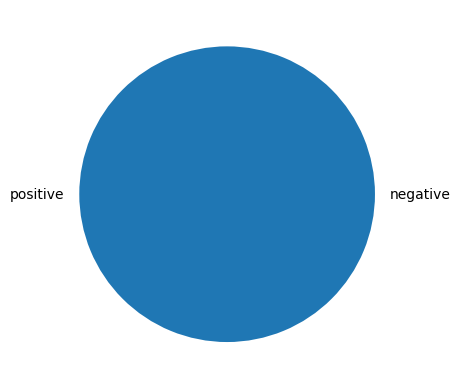

In [ ]:
posi=0
nega=0
for i in range (0,len(ccdata)):
    get_val=ccdata.Comp[i]
    if(float(get_val)<(0)):
        nega=nega+1
    if(float(get_val>(0))):
        posi=posi+1
posper=(posi/(len(ccdata)))*100
negper=(nega/(len(ccdata)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
mlpt.pie(arr,labels=['positive','negative'])
mlpt.plot()

#### Making a new dataframe with necessary columns for providing machine learning.

In [ ]:
df_=ccdata[['Date','Prices','Comp','Negative','Neutral','Positive']].copy()

In [ ]:
df_

,Date,Prices,Comp,Negative,Neutral,Positive
0,2023-05-08,0,0.9985,0.012,0.9,0.9985
1,2023-05-07,0,0.9993,0.006,0.899,0.9993
2,2023-05-06,0,0.9951,0.029,0.927,0.9951
3,2023-05-05,0,1.0,0.023,0.86,1.0
4,2023-05-04,0,1.0,0.025,0.853,1.0
5,2023-05-03,0,0.9999,0.028,0.864,0.9999
6,2023-05-02,0,1.0,0.017,0.865,1.0


#### Dividing the dataset into train and test.

In [ ]:
train_start_index = '0'
train_end_index = '5'
test_start_index = '6'
test_end_index = '8'
train = df_.loc[train_start_index : train_end_index,:]
test = df_.loc[test_start_index:test_end_index,:]

#### Making a 2D array that will store the Negative and Positive sentiment for Training dataset.

In [ ]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

In [ ]:
print(numpy_df_train)

[[0.012  0.9985]
 [0.006  0.9993]
 [0.029  0.9951]
 [0.023  1.    ]
 [0.025  1.    ]
 [0.028  0.9999]]


#### Making a 2D array that will store the Negative and Positive sentiment for Testing dataset.

In [ ]:
sentiment_score_list = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

In [ ]:
print(numpy_df_test)

[[0.017 1.   ]]


#### Making 2 dataframe for Training and Testing "Prices". You can also make 1-D array for the same.

In [ ]:
y_train = pd.DataFrame(train['Prices'])
#y_train=[91,91,91,92,91,92,91]
y_test = pd.DataFrame(test['Prices'])
print(y_train)

   Prices
0       0
1       0
2       0
3       0
4       0
5       0


#### Fitting the sentiments(this acts as in independent value) and prices(this acts as a dependent value (like class-lables in iris dataset))

In [ ]:
# from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train)

RandomForestRegressor()

#### Making Predictions

In [ ]:
prediction = rf.predict(numpy_df_test)

In [ ]:
print(prediction)

[0.]


#### Importing matplotlib library for plotting graph

In [ ]:
import matplotlib.pyplot as plt

#### Defining index position for the test data. Making dataframe for the predicted value.

In [ ]:
idx=np.arange(int(test_start_index),int(test_end_index)+1)
predictions_df_ = pd.DataFrame(data=prediction[0:], index = idx, columns=['Prices'])

ValueError: ignored

In [ ]:
predictions_df_

NameError: ignored

#### Plotting the graph for the Predicted_price VS Actual Price

In [ ]:
ax = predictions_df_.rename(columns={"Prices": "predicted_price"}).plot(title='Random Forest predicted prices')#predicted value
ax.set_xlabel("Indexes")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"Prices": "actual_price"}).plot(ax = ax).get_figure()#actual value
fig.savefig("random forest.png")

NameError: ignored

In [ ]:
# from treeinterpreter import treeinterpreter as ti
# from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix

reg = LinearRegression()
reg.fit(numpy_df_train, y_train)

In [ ]:
reg.predict(numpy_df_test)

### NOTE: Since our dataset is very small and as you can see that fetching 600 tweets could only make data for just 10 days.Also the prediction is not very great in such small dataset. So we found this new dataset on internet which has the Text as "Tweets" and respective "close price" and "Adjusted close price".


### Adjusted Close Price: An adjusted closing price is a stock's closing price on any given day of trading that has been amended to include any distributions and corporate actions that occurred at any time before the next day's open.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/AAPL.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)

# Drop null values
df.dropna(inplace=True)
df.tail()

In [ ]:
# Dataframe with Adj close, ts_polarity, twitter_volume of APPL
df = df[["Adj Close", "ts_polarity", "twitter_volume"]]
df.head()

In [ ]:
df["Pct_change"] = df["Adj Close"].pct_change()

# Drop null values
df.dropna(inplace = True)
df.head()

In [ ]:
def window_data(df, window, feature_col_number1, feature_col_number2, feature_col_number3, target_col_number):
    # Create empty lists "X_close", "X_polarity", "X_volume" and y
    X_close = []
    X_polarity = []
    X_volume = []
    y = []
    for i in range(len(df) - window):
        
        # Get close, ts_polarity, tw_vol, and target in the loop
        close = df.iloc[i:(i + window), feature_col_number1]
        ts_polarity = df.iloc[i:(i + window), feature_col_number2]
        tw_vol = df.iloc[i:(i + window), feature_col_number3]
        target = df.iloc[(i + window), target_col_number]
        
        # Append values in the lists
        X_close.append(close)
        X_polarity.append(ts_polarity)
        X_volume.append(tw_vol)
        y.append(target)
        
    return np.hstack((X_close,X_polarity,X_volume)), np.array(y).reshape(-1, 1)

In [ ]:
window_size = 3

# Column index 0 is the `Adj Close` column
# Column index 1 is the `ts_polarity` column
# Column index 2 is the `twitter_volume` column
feature_col_number1 = 0
feature_col_number2 = 1
feature_col_number3 = 2
target_col_number = 0
X, y = window_data(df, window_size, feature_col_number1, feature_col_number2, feature_col_number3, target_col_number)

In [ ]:
X_split = int(0.7 * len(X))
y_split = int(0.7 * len(y))

X_train = X[: X_split]
X_test = X[X_split:]
y_train = y[: y_split]
y_test = y[y_split:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
x_train_scaler = MinMaxScaler()
x_test_scaler = MinMaxScaler()
y_train_scaler = MinMaxScaler()
y_test_scaler = MinMaxScaler()

# Fit the scaler for the Training Data
x_train_scaler.fit(X_train)
y_train_scaler.fit(y_train)

# Scale the training data
X_train = x_train_scaler.transform(X_train)
y_train = y_train_scaler.transform(y_train)

# Fit the scaler for the Testing Data
x_test_scaler.fit(X_test)
y_test_scaler.fit(y_test)

# Scale the y_test data
X_test = x_test_scaler.transform(X_test)
y_test = y_test_scaler.transform(y_test)


In [ ]:
# Create the Random Forest regressor instance
model = RandomForestRegressor(n_estimators=1000, max_depth=2, bootstrap=False, min_samples_leaf=1)


In [ ]:
# Fit the model
model.fit(X_train, y_train.ravel())

In [ ]:
# Make some predictions
predicted = model.predict(X_test)

In [ ]:
# Evaluating the model
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print('R-squared :', metrics.r2_score(y_test, predicted))

In [ ]:
predicted_prices = y_test_scaler.inverse_transform(predicted.reshape(-1, 1))
real_prices = y_test_scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = df.index[-len(real_prices): ]) 
stocks.head()

In [ ]:
# Plot the real vs predicted values as a line chart
stocks.plot(title = "Real vs Predicted values of APPL")

##Microsoft 

Fetching tweets for Microsoft in extended mode (means entire tweet will come and not just few words + link)

In [ ]:
fetch_tweets=tweepy.Cursor(api.search_tweets, q="#MSFT",count=100, lang ="en",since="2016-9-13", tweet_mode="extended").items()
data=pd.DataFrame(data=[[tweet_info.created_at.date(),tweet_info.full_text]for tweet_info in fetch_tweets],columns=['Date','Tweets'])

In [ ]:
data

#### Removing special character from each tweets

In [ ]:
data.to_csv("Tweets.csv")
cdata=pd.DataFrame(columns=['Date','Tweets'])
total=100
index=0
for index,row in data.iterrows():
    stre=row["Tweets"]
    my_new_string = re.sub('[^ a-zA-Z0-9]', '', stre)
    temp_df = pd.DataFrame([[data["Date"].iloc[index], 
                            my_new_string]], columns = ['Date','Tweets'])
    cdata = pd.concat([cdata, temp_df], axis = 0).reset_index(drop = True)
   

#### Displaying the data with date and tweets, you can notice there are multiple tweets for each day. So we will club them together later.

In [ ]:
cdata

#### Creating a dataframe where we will combine the tweets date wise and store into

In [ ]:
ccdata=pd.DataFrame(columns=['Date','Tweets'])

In [ ]:
indx=0
get_tweet=""
for i in range(0,len(cdata)-1):
    get_date=cdata.Date.iloc[i]
    next_date=cdata.Date.iloc[i+1]
    if(str(get_date)==str(next_date)):
        get_tweet=get_tweet+cdata.Tweets.iloc[i]+" "
    if(str(get_date)!=str(next_date)):
        temp_df = pd.DataFrame([[get_date, 
                                get_tweet]], columns = ['Date','Tweets'])
        ccdata = pd.concat([ccdata, temp_df], axis = 0).reset_index(drop = True)
        get_tweet=" "

In [ ]:
ccdata

In [ ]:
read_stock_p=pd.read_csv('/content/drive/MyDrive/Tdataset/MSFT.csv')
read_stock_p

#### Adding a "Price" column in our dataframe and fetching the stock price as per the date in our dataframe.

In [ ]:
ccdata['Prices']=""
print(ccdata.columns)

In [ ]:
indx=0
for i in range (0,len(ccdata)):
    for j in range (0,len(read_stock_p)):
        get_tweet_date=ccdata.Date.iloc[i]
        get_stock_date=read_stock_p.Date.iloc[j]
        if(str(get_stock_date)==str(get_tweet_date)):
            # print(get_stock_date," ",get_tweet_date)
            # ccdata.set_value(i,'Prices',int(read_stock_p.Close[j]))
            ccdata['Prices'].iloc[i] = int(read_stock_p.Close[j])

#### Prices are fetched but some entires are blank as close price might not be available for that day due to some reason (like holiday, etc.)

In [ ]:
ccdata


In [ ]:
mean=0
summ=0
count=0
for i in range(0,len(ccdata)):
    if(ccdata.Prices.iloc[i]!=""):
        summ=summ+int(ccdata.Prices.iloc[i])
        count=count+1
mean=summ/count
for i in range(0,len(ccdata)):
    if(ccdata.Prices.loc[i]==""):
        ccdata.Prices.loc[i]=int(mean)

#### Now all the entries have some value

In [ ]:
ccdata

In [ ]:
ccdata['Prices'] = ccdata['Prices'].apply(np.int64)

#### Adding 4 new columns in our dataframe so that sentiment analysis could be performed.. Comp is "Compound" it will tell whether the statement is overall negative or positive. If it has negative value then it is negative, if it has positive value then it is positive. If it has value 0, then it is neutral.

In [ ]:
ccdata["Comp"] = ''
ccdata["Negative"] = ''
ccdata["Neutral"] = ''
ccdata["Positive"] = ''
ccdata

In [ ]:
import nltk
nltk.download('vader_lexicon')

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in ccdata.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', ccdata.loc[indexx, 'Tweets'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        ccdata['Comp'].iloc[indexx] = sentence_sentiment['compound']
        ccdata['Negative'].iloc[indexx] = sentence_sentiment['neg']
        ccdata['Neutral'].iloc[indexx] = sentence_sentiment['neu']
        ccdata['Positive'].iloc[indexx] = sentence_sentiment['compound']
        # ccdata.set_value(indexx, 'Comp', sentence_sentiment['pos'])
        # ccdata.set_value(indexx, 'Negative', sentence_sentiment['neg'])
        # ccdata.set_value(indexx, 'Neutral', sentence_sentiment['neu'])
        # ccdata.set_value(indexx, 'Positive', sentence_sentiment['pos'])
    except TypeError:
        print (stocks_dataf.loc[indexx, 'Tweets'])
        print (indexx)

In [ ]:
ccdata

#### Calculating the percentage of postive and negative tweets, and plotting the PIE chart for the same.

In [ ]:
posi=0
nega=0
for i in range (0,len(ccdata)):
    get_val=ccdata.Comp[i]
    if(float(get_val)<(0)):
        nega=nega+1
    if(float(get_val>(0))):
        posi=posi+1
posper=(posi/(len(ccdata)))*100
negper=(nega/(len(ccdata)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
mlpt.pie(arr,labels=['positive','negative'])
mlpt.plot()

#### Making a new dataframe with necessary columns for providing machine learning.

In [ ]:
df_=ccdata[['Date','Prices','Comp','Negative','Neutral','Positive']].copy()

In [ ]:
df_

#### Dividing the dataset into train and test.

In [ ]:
train_start_index = '0'
train_end_index = '5'
test_start_index = '6'
test_end_index = '8'
train = df_.loc[train_start_index : train_end_index,:]
test = df_.loc[test_start_index:test_end_index,:]

#### Making a 2D array that will store the Negative and Positive sentiment for Training dataset.

In [ ]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

#### Making a 2D array that will store the Negative and Positive sentiment for Training dataset.

In [ ]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

In [ ]:
print(numpy_df_train)

#### Making 2 dataframe for Training and Testing "Prices". You can also make 1-D array for the same.

In [ ]:
y_train = pd.DataFrame(train['Prices'])
#y_train=[91,91,91,92,91,92,91]
y_test = pd.DataFrame(test['Prices'])
print(y_train)


#### Fitting the sentiments(this acts as in independent value) and priceses in i(this acts as a dependent value)

In [ ]:
# from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train)

#### Making Predictions

In [ ]:
prediction = rf.predict(numpy_df_test)

In [ ]:
print(prediction)

#### Importing matplotlib library for plotting graph

In [ ]:
import matplotlib.pyplot as plt

#### Defining index position for the test data. Making dataframe for the predicted value.

In [ ]:
idx=np.arange(int(test_start_index),int(test_end_index)+1)
predictions_df_ = pd.DataFrame(data=prediction[0:], index = idx, columns=['Prices'])

In [ ]:
predictions_df_

#### Plotting the graph for the Predicted_price VS Actual Price

In [ ]:
ax = predictions_df_.rename(columns={"Prices": "predicted_price"}).plot(title='Random Forest predicted prices')#predicted value
ax.set_xlabel("Indexes")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"Prices": "actual_price"}).plot(ax = ax).get_figure()#actual value
fig.savefig("random forest.png")

In [ ]:
# from treeinterpreter import treeinterpreter as ti
# from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix

reg = LinearRegression()
reg.fit(numpy_df_train, y_train)

In [ ]:
print("Real Value: ")
print(y_train)

In [ ]:
print("Predicted: ")
reg.predict(numpy_df_test)

##TESLA

#### Fetching tweets for Tesla  in extended mode (means entire tweet will come and not just few words + link)

In [ ]:
fetch_tweets=tweepy.Cursor(api.search_tweets, q="#TESLA",count=100, lang ="en",since="2016-9-13", tweet_mode="extended").items()
data=pd.DataFrame(data=[[tweet_info.created_at.date(),tweet_info.full_text]for tweet_info in fetch_tweets],columns=['Date','Tweets'])

In [ ]:
data

#### Removing special character from each tweets

In [ ]:
data.to_csv("Tweets.csv")
cdata=pd.DataFrame(columns=['Date','Tweets'])
total=100
index=0
for index,row in data.iterrows():
    stre=row["Tweets"]
    my_new_string = re.sub('[^ a-zA-Z0-9]', '', stre)
    temp_df = pd.DataFrame([[data["Date"].iloc[index], 
                            my_new_string]], columns = ['Date','Tweets'])
    cdata = pd.concat([cdata, temp_df], axis = 0).reset_index(drop = True)
    

#### Displaying the data with date and tweets, you can notice there are multiple tweets for each day. So we will club them together later.

In [ ]:
cdata

#### Creating a dataframe where we will combine the tweets date wise and store into

In [ ]:
ccdata=pd.DataFrame(columns=['Date','Tweets'])

In [ ]:
indx=0
get_tweet=""
for i in range(0,len(cdata)-1):
    get_date=cdata.Date.iloc[i]
    next_date=cdata.Date.iloc[i+1]
    if(str(get_date)==str(next_date)):
        get_tweet=get_tweet+cdata.Tweets.iloc[i]+" "
    if(str(get_date)!=str(next_date)):
        temp_df = pd.DataFrame([[get_date, 
                                get_tweet]], columns = ['Date','Tweets'])
        ccdata = pd.concat([ccdata, temp_df], axis = 0).reset_index(drop = True)
        get_tweet=" "

#### All the tweets has been clubbed as per their 

1.   List item
2.   List item

date.

In [ ]:
ccdata

#### Now to know the "closing price" of each day we will import STOCK PRICE DATA for TESLA  from "yahoo.finance". We will consider "Close" price only.

In [ ]:
read_stock_p=pd.read_csv('/content/drive/MyDrive/Tdataset/TSLA.csv')
read_stock_p
# read_stock_p.info()

#### Adding a "Price" column in our dataframe and fetching the stock price as per the date in our dataframe.

In [ ]:
ccdata['Prices']=""
print(ccdata.columns)

In [ ]:
indx=0
for i in range (0,len(ccdata)):
    for j in range (0,len(read_stock_p)):
        get_tweet_date=ccdata.Date.iloc[i]
        get_stock_date=read_stock_p.Date.iloc[j]
        if(str(get_stock_date)==str(get_tweet_date)):
            # print(get_stock_date," ",get_tweet_date)
            # ccdata.set_value(i,'Prices',int(read_stock_p.Close[j]))
            ccdata['Prices'].iloc[i] = int(read_stock_p.Close[j])

In [ ]:
ccdata


In [ ]:
mean=0
summ=0
count=0
for i in range(0,len(ccdata)):
    if(ccdata.Prices.iloc[i]!=""):
        summ=summ+int(ccdata.Prices.iloc[i])
        count=count+1
mean=summ/count
for i in range(0,len(ccdata)):
    if(ccdata.Prices.loc[i]==""):
        ccdata.Prices.loc[i]=int(mean)

In [ ]:
ccdata

In [ ]:
ccdata['Prices'] = ccdata['Prices'].apply(np.int64)

In [ ]:
ccdata["Comp"] = ''
ccdata["Negative"] = ''
ccdata["Neutral"] = ''
ccdata["Positive"] = ''
ccdata

In [ ]:
import nltk
nltk.download('vader_lexicon')

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in ccdata.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', ccdata.loc[indexx, 'Tweets'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        ccdata['Comp'].iloc[indexx] = sentence_sentiment['compound']
        ccdata['Negative'].iloc[indexx] = sentence_sentiment['neg']
        ccdata['Neutral'].iloc[indexx] = sentence_sentiment['neu']
        ccdata['Positive'].iloc[indexx] = sentence_sentiment['compound']
        # ccdata.set_value(indexx, 'Comp', sentence_sentiment['pos'])
        # ccdata.set_value(indexx, 'Negative', sentence_sentiment['neg'])
        # ccdata.set_value(indexx, 'Neutral', sentence_sentiment['neu'])
        # ccdata.set_value(indexx, 'Positive', sentence_sentiment['pos'])
    except TypeError:
        print (stocks_dataf.loc[indexx, 'Tweets'])
        print (indexx)

In [ ]:
ccdata

#### Calculating the percentage of postive and negative tweets, and plotting the PIE chart for the same.

In [ ]:
posi=0
nega=0
for i in range (0,len(ccdata)):
    get_val=ccdata.Comp[i]
    if(float(get_val)<(0)):
        nega=nega+1
    if(float(get_val>(0))):
        posi=posi+1
posper=(posi/(len(ccdata)))*100
negper=(nega/(len(ccdata)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
mlpt.pie(arr,labels=['positive','negative'])
mlpt.plot()

In [ ]:
#### Making a new dataframe with necessary columns for providing machine learning.

In [ ]:
df_=ccdata[['Date','Prices','Comp','Negative','Neutral','Positive']].copy()

In [ ]:
df_

#### Dividing the dataset into train and test.

In [ ]:
train_start_index = '0'
train_end_index = '5'
test_start_index = '6'
test_end_index = '8'
train = df_.loc[train_start_index : train_end_index,:]
test = df_.loc[test_start_index:test_end_index,:]

#### Making a 2D array that will store the Negative and Positive sentiment for Testing dataset.

In [ ]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

In [ ]:
print(numpy_df_train)

#### Making 2 dataframe for Training and Testing "Prices". You can also make 1-D array for the same.

In [ ]:
y_train = pd.DataFrame(train['Prices'])
#y_train=[91,91,91,92,91,92,91]
y_test = pd.DataFrame(test['Prices'])
print(y_train)

In [ ]:
# from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train)

#### Making Predictions

In [ ]:
prediction = rf.predict(numpy_df_test)

In [ ]:
print(prediction)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
idx=np.arange(int(test_start_index),int(test_end_index)+1)
predictions_df_ = pd.DataFrame(data=prediction[0:], index = idx, columns=['Prices'])

In [ ]:
predictions_df_

In [ ]:
#### Plotting the graph for the Predicted_price VS Actual Price

In [ ]:
ax = predictions_df_.rename(columns={"Prices": "predicted_price"}).plot(title='Random Forest predicted prices')#predicted value
ax.set_xlabel("Indexes")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"Prices": "actual_price"}).plot(ax = ax).get_figure()#actual value
fig.savefig("random forest.png")

In [ ]:
# from treeinterpreter import treeinterpreter as ti
# from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix

reg = LinearRegression()
reg.fit(numpy_df_train, y_train)

In [ ]:
reg.predict(numpy_df_test)